# Baseline MLP Classifier 

Scipy classifier train on the energy-based feature extraction data. 

## Tasks
- [x] Import data.
- [x] Encode labels as one-hot vectors.
- [x] Split data into training and test sets.
- [x] Train and validate classifier (MLP)
- [x] Create procedure for adjusting number of input classes given to the model.
- [x] Represent the results.

In [155]:
# Import Box #
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io

from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix


Shape of X: (258, 20);
Shape of Y: (258, 1)


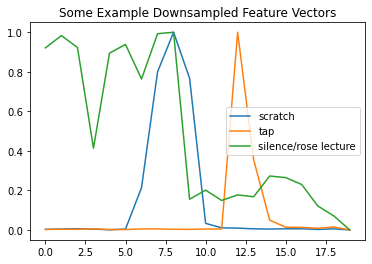

In [151]:
# Get Processed Data #
path_X = 'processed_data/X_energy.npy'
path_Y = 'processed_data/Y_energy.npy'

# path_X_4class = 'processed_data/X_energy_4class.npy'
# path_Y_4class = 'processed_data/Y_energy_4class.npy'


X = np.load(path_X)
Y = np.load(path_Y)-1
# X = np.load(path_X_4class)
# Y = np.load(path_Y_4class)-1

label_names = ['scratch', 'tap', 'silence/rose lecture']

print("Shape of X: {};\nShape of Y: {}".format(X.shape, Y.shape))

plt.plot(X[1,:])
plt.plot(X[100,:])
plt.plot(X[200,:])
# plt.plot(X[330,:])
plt.title('Some Example Downsampled Feature Vectors')
plt.legend([label_names[int(Y[1][0])], 
            label_names[int(Y[100][0])], 
            label_names[int(Y[200][0])]])
plt.show()

In [152]:
# Encoding Y as one-hot

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y_encoded = enc.transform(Y)

Y_encoded

<258x3 sparse matrix of type '<class 'numpy.float64'>'
	with 258 stored elements in Compressed Sparse Row format>

In [153]:
# Training Model

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(100,)).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("OVERALL SCORE OF MLP on TEST SET: {}".format(score))

score = clf.score(X_train, y_train)
print("\nOVERALL SCORE OF MLP on TRAIN SET: {}".format(score))

OVERALL SCORE OF MLP on TEST SET: 0.9384615384615385

OVERALL SCORE OF MLP on TRAIN SET: 0.9948186528497409


In [154]:
# Generating a Confusion Matrix
y_true = enc.inverse_transform(y_test)
y_pred = enc.inverse_transform(clf.predict(X_test))

print("=================================================")
print("=== RESULTS FOR INITIAL DATASET BASLINE MODEL ===")
print("=================================================\n")


print('\nTotal Dataset Size: \t\t{} Samples'.format(len(X)))
print('Total Training Set Size: \t{} Samples\nTotal Validation Set Size: \t{} Samples\n'.format(len(X_train), len(X_test)))

print('Test Set Confusion Matrix: {}'.format(label_names))
print(confusion_matrix(y_true, y_pred))


y_true = enc.inverse_transform(y_train)
y_pred = enc.inverse_transform(clf.predict(X_train))

print('\nTraining Set Confusion Matrix: {}'.format(label_names))
print(confusion_matrix(y_true, y_pred))

score = clf.score(X_test, y_test)
print("\nOVERALL SCORE OF MLP on TEST SET: \t{}%".format(score*100))

score = clf.score(X_train, y_train)
print("OVERALL SCORE OF MLP on TRAIN SET: \t{}%".format(score*100))

=== RESULTS FOR INITIAL DATASET BASLINE MODEL ===


Total Dataset Size: 		258 Samples
Total Training Set Size: 	193 Samples
Total Validation Set Size: 	65 Samples

Test Set Confusion Matrix: ['scratch', 'tap', 'silence/rose lecture']
[[23  1  0]
 [ 1 16  0]
 [ 0  1 23]]

Training Set Confusion Matrix: ['scratch', 'tap', 'silence/rose lecture']
[[61  1  0]
 [ 0 69  0]
 [ 0  0 62]]

OVERALL SCORE OF MLP on TEST SET: 	93.84615384615384%
OVERALL SCORE OF MLP on TRAIN SET: 	99.48186528497409%
